Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


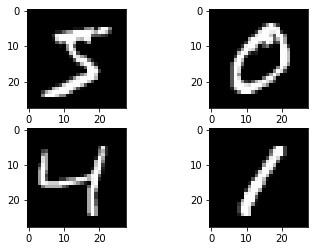

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
import numpy as np
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
from keras.utils import np_utils
# one hot encode outputs
Y_test = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
hidden_layers=16
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layers, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model

In [24]:
import random
random.seed(42)
model = baseline_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2054 - acc: 0.0975 - val_loss: 0.1632 - val_acc: 0.0974
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1386 - acc: 0.0975 - val_loss: 0.1204 - val_acc: 0.0974
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1111 - acc: 0.0975 - val_loss: 0.1042 - val_acc: 0.0974
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1005 - acc: 0.0974 - val_loss: 0.0976 - val_acc: 0.0973
Epoch 5/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0958 - acc: 0.0828 - val_loss: 0.0944 - val_acc: 0.0825
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0935 - acc: 0.1106 - val_loss: 0.0928 - val_acc: 0.1135
Epoch 7/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0922 - acc: 0.1124 - val_loss: 0.0918 - val_a

In [29]:
#Changed the Number of epochs to 20, NO change in Accuracy was observed.

model1 = baseline_model()
# Fit the model
nn_simple = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)
# Final evaluation of the model
scores1 = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores1[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores1[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2117 - acc: 0.0904 - val_loss: 0.1735 - val_acc: 0.0892
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1483 - acc: 0.0901 - val_loss: 0.1286 - val_acc: 0.0869
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1175 - acc: 0.0861 - val_loss: 0.1091 - val_acc: 0.1041
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1042 - acc: 0.1054 - val_loss: 0.1005 - val_acc: 0.1068
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0981 - acc: 0.0994 - val_loss: 0.0963 - val_acc: 0.0952
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0950 - acc: 0.0965 - val_loss: 0.0940 - val_acc: 0.1026
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0933 - acc: 0.1072 - val_loss: 0.0927 - val_ac

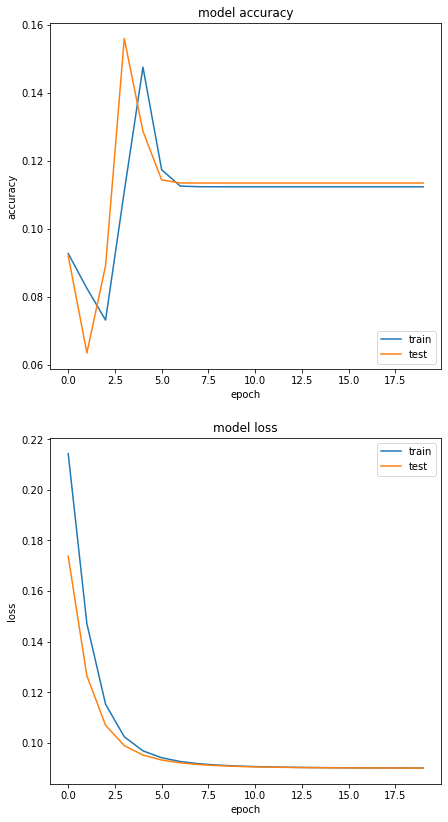

In [19]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


1135  classified correctly
8865  classified incorrectly


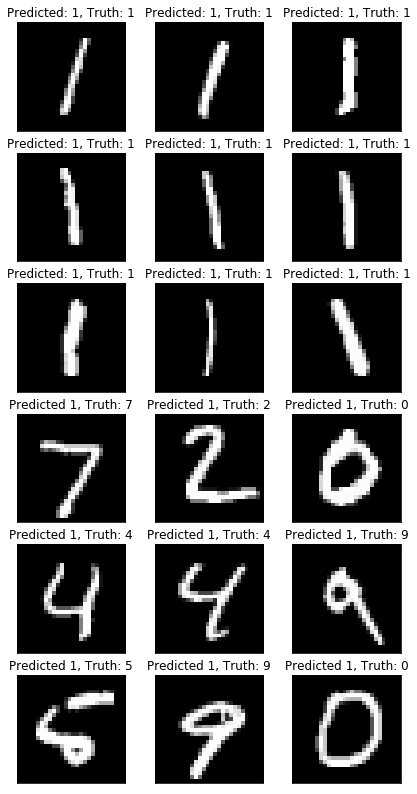

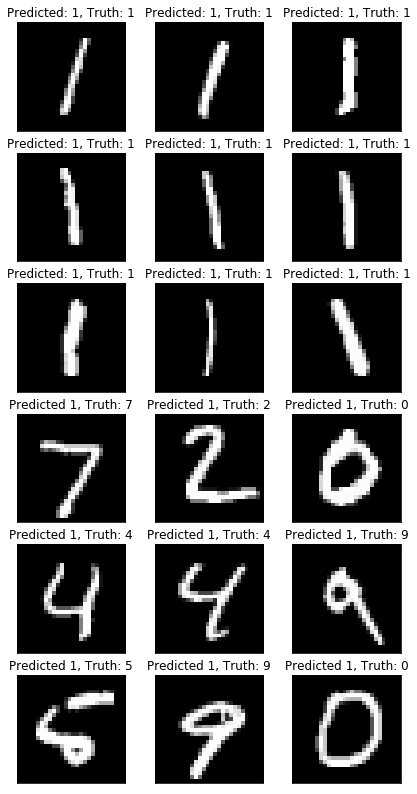

In [8]:
import numpy as np
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation


In [0]:
## Changed the number of neurons to 32 from 16, No change was seen when compared to Baseline Model

neurons=32
def Model_Q1():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(neurons, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model

In [33]:
model_Q1 = Model_Q1()
# Fit the model
nn_simple2 = model_Q1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores2 = model_Q1.evaluate(X_test, y_test)
print("Model With 32 Neurons Error: %.2f%%" % (100-scores2[1]*100))
print("Model With 32 Neurons Accuracy: %.2f%%" % (scores2[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1952 - acc: 0.1022 - val_loss: 0.1550 - val_acc: 0.1010
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1324 - acc: 0.1022 - val_loss: 0.1160 - val_acc: 0.1010
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1078 - acc: 0.1022 - val_loss: 0.1018 - val_acc: 0.1010
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0985 - acc: 0.1022 - val_loss: 0.0961 - val_acc: 0.1009
Epoch 5/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0946 - acc: 0.1023 - val_loss: 0.0934 - val_acc: 0.1002
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0927 - acc: 0.1143 - val_loss: 0.0921 - val_acc: 0.1238
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0917 - acc: 0.1136 - val_loss: 0.0913 - val_ac

In [0]:
#Model with one extra hidden layer with activation function Relu, with 16 neurons each.
#The Accuracy Increased from 88.65% to 89.04%

neurons=16
def Model_Q3():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(neurons, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(neurons, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model

In [34]:
model_Q3 = Model_Q3()
# Fit the model
nn_simple3 = model_Q3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores3 = model_Q3.evaluate(X_test, y_test)
print("Model With Extra Layer Error: %.2f%%" % (100-scores3[1]*100))
print("Model With Extra Layer Accuracy: %.2f%%" % (scores3[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2399 - acc: 0.0993 - val_loss: 0.2304 - val_acc: 0.1031
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.2184 - acc: 0.0993 - val_loss: 0.2042 - val_acc: 0.1032
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1845 - acc: 0.0993 - val_loss: 0.1618 - val_acc: 0.1032
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1389 - acc: 0.0993 - val_loss: 0.1188 - val_acc: 0.1032
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1074 - acc: 0.0993 - val_loss: 0.0994 - val_acc: 0.1032
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0958 - acc: 0.0986 - val_loss: 0.0933 - val_acc: 0.1021
Epoch 7/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0922 - acc: 0.1000 - val_loss: 0.0913 - val_a

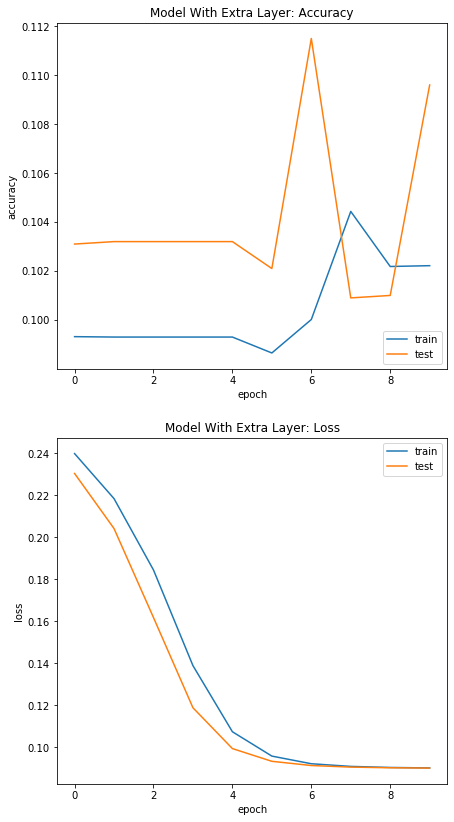

In [35]:
plt.subplot(2,1,1)
plt.plot(nn_simple3.history['acc'])
plt.plot(nn_simple3.history['val_acc'])
plt.title('Model With Extra Layer: Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple3.history['loss'])
plt.plot(nn_simple3.history['val_loss'])
plt.title('Model With Extra Layer: Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()